<a href="https://colab.research.google.com/github/JuanCappelletti/Consteel_H06/blob/trends/Muestra_Micro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Analisis micro de una muertra especifica`***

In [ ]:
#@title Ejecutar librerias { run: "auto", display-mode: "form" }
from matplotlib.font_manager import json_dump
from numpy.matrixlib.defmatrix import N
from operator import truediv
import numpy as np
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from IPython.display import Image
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)

In [ ]:
#@title CARGA DE DATA_SET 
Url = "https://raw.githubusercontent.com/JuanCappelletti/Consteel_H06/main/Particular9102022_1.csv" #@param {type:"string"}
datos = pd.read_csv(Url,sep=";",decimal=",")
df=pd.DataFrame(datos)
dfx=df.copy()
dfx.Time= dfx.Date.values+' '+dfx.Time.values  

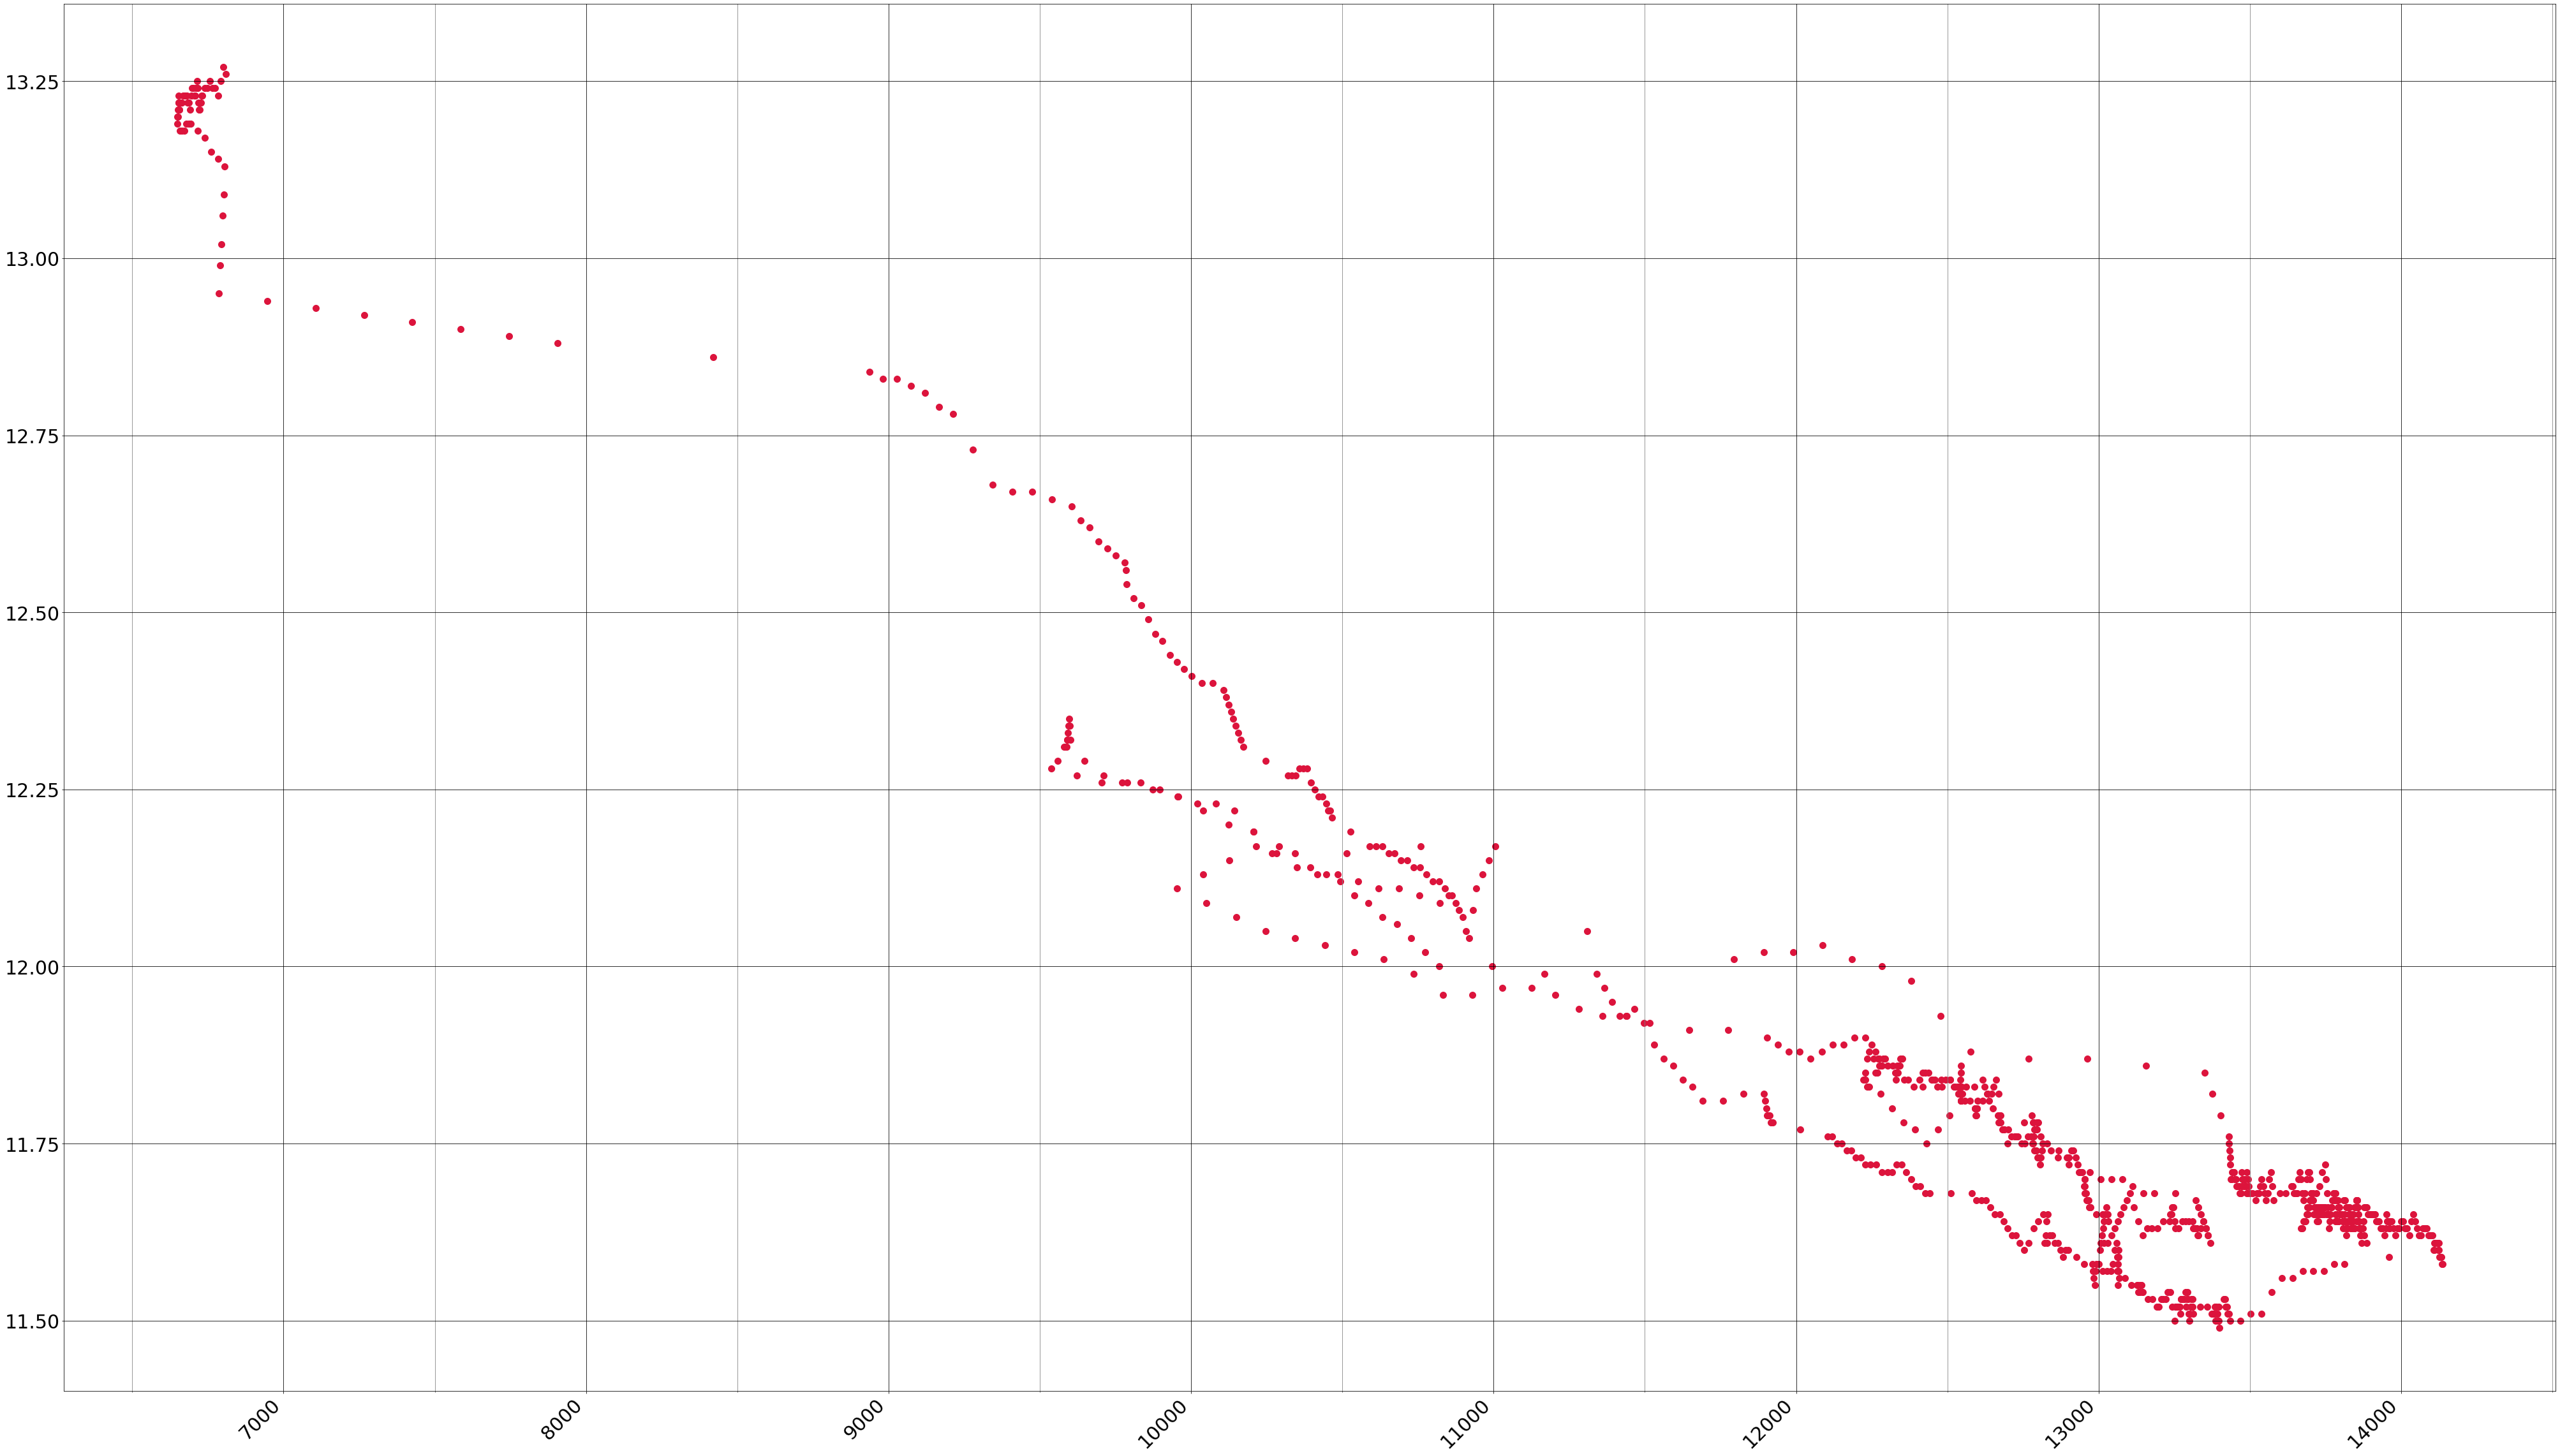

In [ ]:
fig1, ax = plt.subplots(1, figsize=(70,40))
ax.scatter(dfx['FQI161'],dfx['PIR161'],color='crimson',s=100)
labels = ax.get_xticklabels()
labels1= ax.get_yticklabels()
plt.setp(labels, rotation=45,fontsize=30, horizontalalignment='right')
plt.setp(labels1,fontsize=30, horizontalalignment='right')

ax.xaxis.set_major_locator(MultipleLocator(1000),)
ax.xaxis.set_minor_locator(MultipleLocator(500),)
ax.axes.grid(True, which='minor',color='grey',axis='both')
ax.axes.grid(True, which='major',color='black',axis='both')
fig1.show()

ax.autoscale_view()

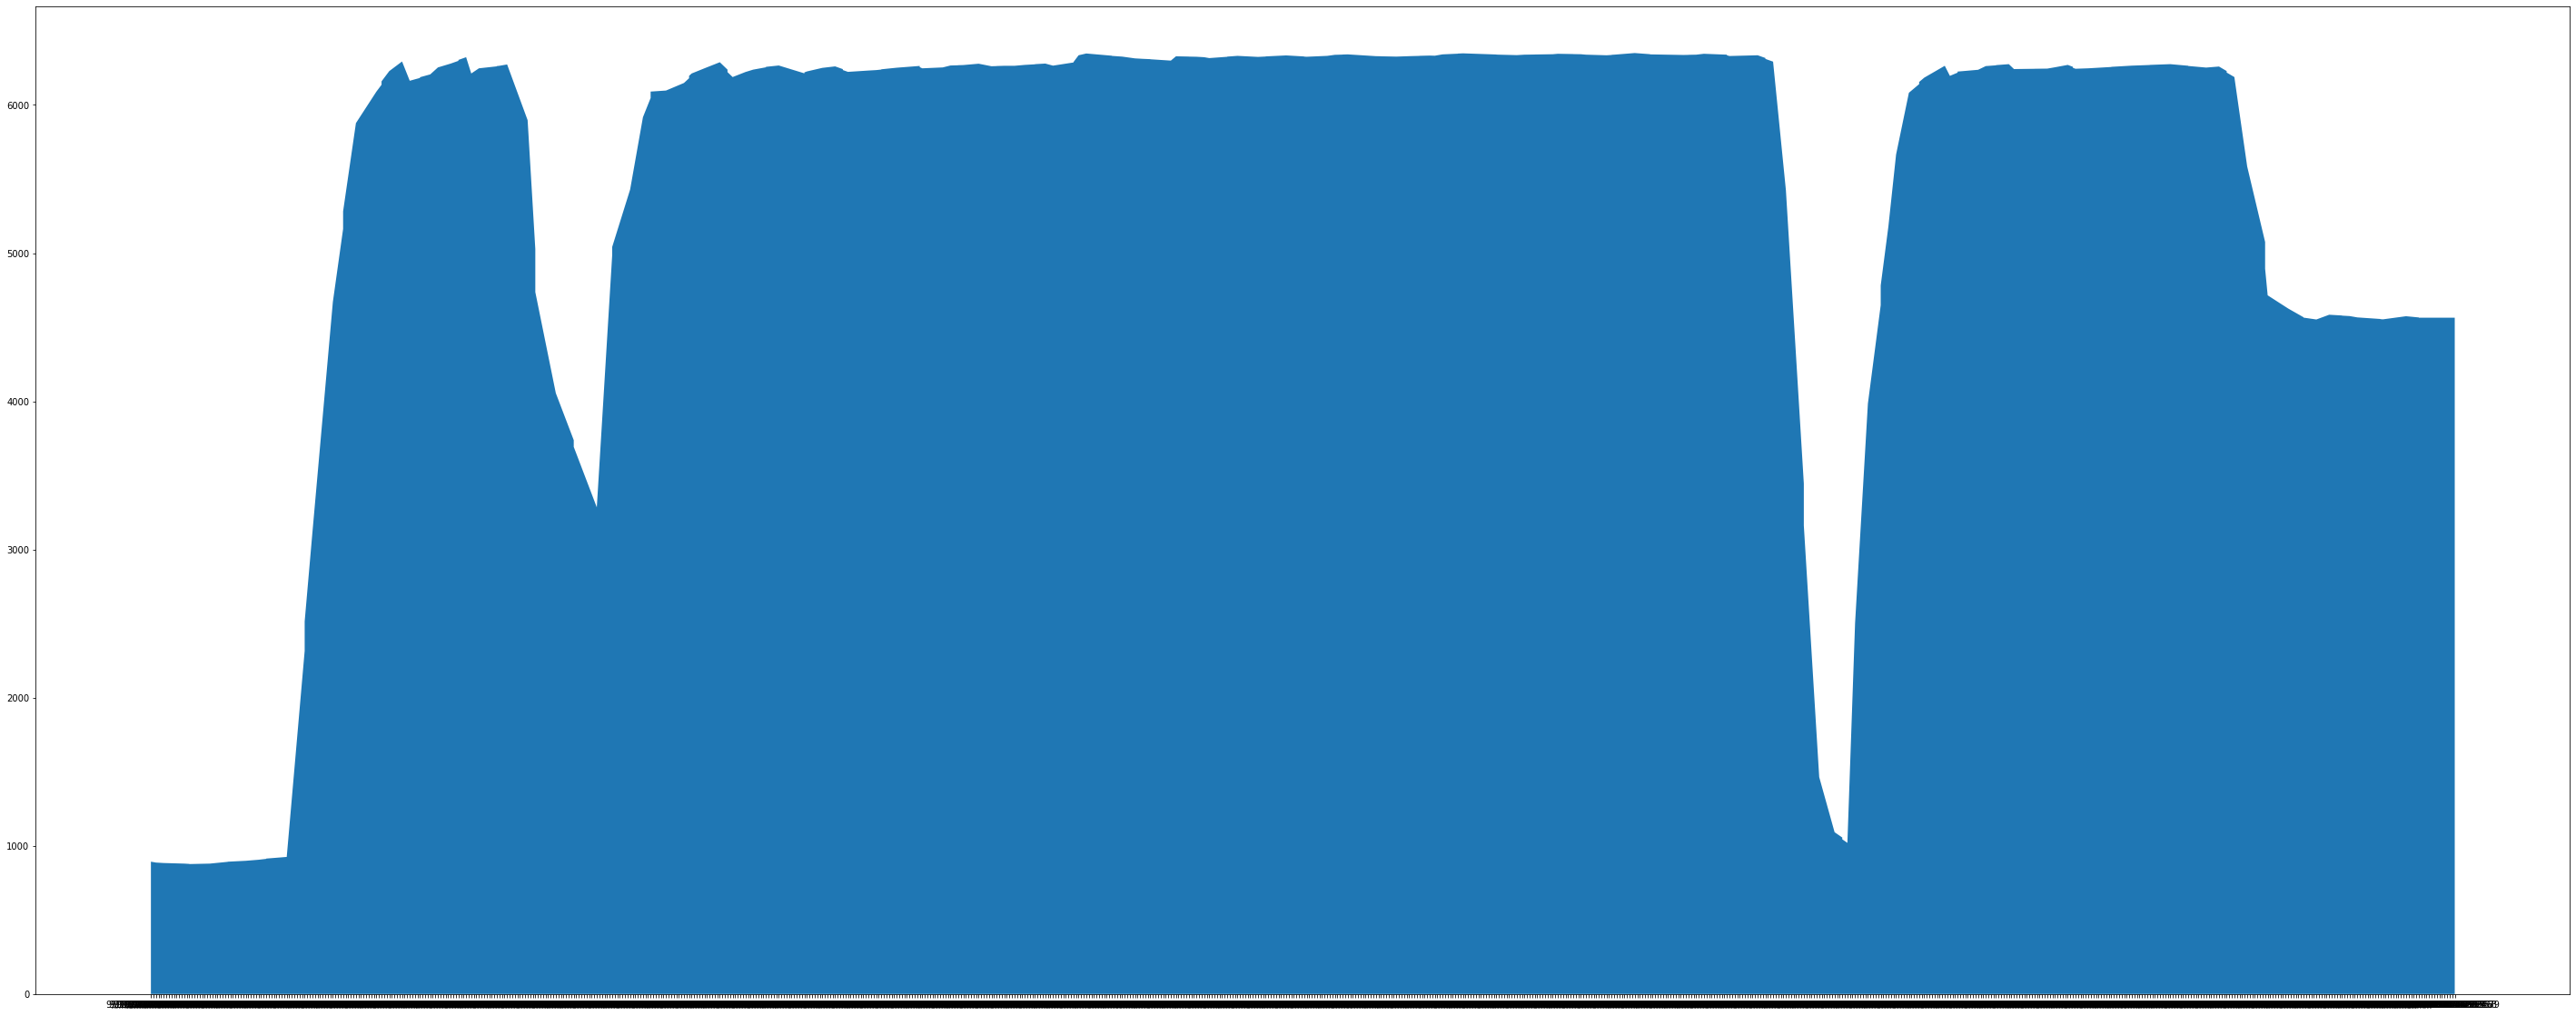

In [ ]:
#dfaux=dfx.loc[dfx.loc[:,'FQI161'] >= 10000]
#dfaux=dfx.loc[(dfx.loc[:,'FQI169']+dfx.loc[:,'FQI165'] ) >= 10000]
#dfaux.FQI165.describe()
figB, (ax)= plt.subplots(1, figsize=(50,20))

ax.stackplot(dfx['Time'],dfx['FQI165'])






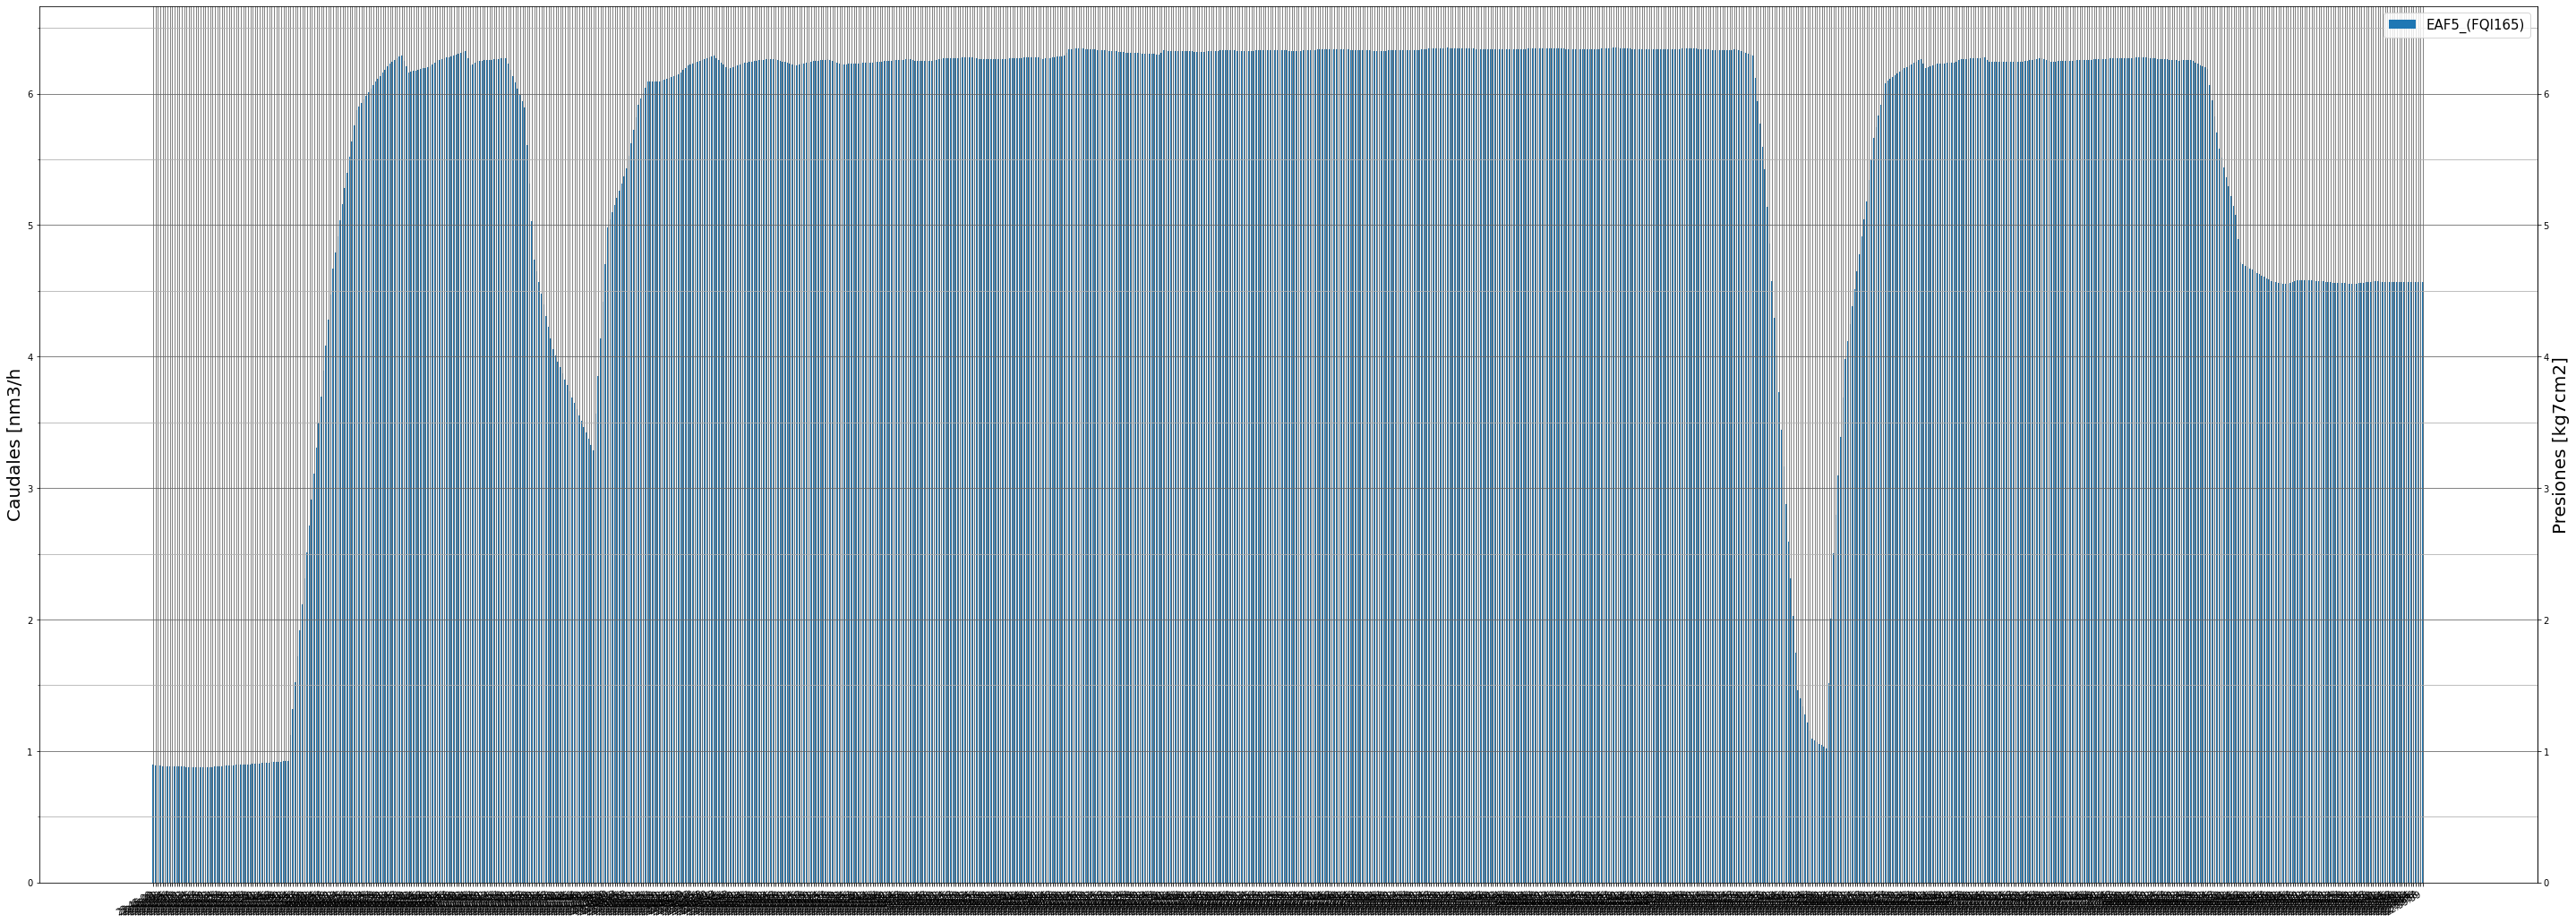

In [ ]:
from pyparsing.helpers import string
#@title GRAFICA DE CONSUMOS EN CONDICIÓN DADA ( DISTRIBUCIÓN DE CAUDLES Y PRESIÓN)
Muestra = df #@param {type:"raw"}
MU=str(Muestra)


# DEFINICION DE BARA EN COLORES------------------------------------
def GRAFICO_BARRA(B,l):
  fig3, (ax)= plt.subplots(1, figsize=(50,20))
  bar1=np.arange(len(B.Time))
  
  w=0.6
  AA=1
  z=len(B)
  IND=list((B.indice.values))
  x= list(B.Time.values)
  y= list((B.FQI161.values/1000)+0.25)
  #j= (df.loc[0]['Date']).replace('/','')
  #o='Barra_M'+l+j+".jpg"

  ax.bar(bar1,B.FQI165/1000,w,color="tab:blue",label="EAF5_(FQI165)")
  #ax.bar(bar1,B.FQI169/1000,w,bottom=B.FQI165/1000,color="orange",label="EAF4_(FQI169)")
  #ax.bar(bar1,B.FQI177/1000,w,bottom=(B.FQI165+B.FQI169)/1000,color="green",label="CC2_(FQI177)")
  #ax.bar(bar1,B.FQI173/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177)/1000,color="red",label="CC3_()FQI173")
  #ax.bar(bar1,B.FQI151/1000,w,bottom=(B.FQI165+B.FQI169+B.FQI177+B.FQI173)/1000,color="violet",alpha=AA,label="RESTO_(FQI151)")
  plt.xticks(bar1,B.Time)
  #ax.plot(bar1,B.PIR161,label="PRESSURE_(PIR161)")
  #r,=ax.plot(B.Time,B.PIR161)#,'o',color="black")
  ax.grid(visible=True,which='major',color='#666666',linestyle='-')
  ax.set_ylabel('Caudales [nm3/h',fontsize=20)
  secax_y=ax.secondary_yaxis("right",functions=None)
  secax_y.set_ylabel(r'Presiones [kg7cm2]',fontsize=20)

  #for i in range(0,z):
    # plt.text(x[i],y[i],str(IND[i]),fontsize=20,horizontalalignment='center',
              #rotation='vertical')    
  ax.yaxis.grid(True, which='minor')
  ax.yaxis.set_minor_locator(MultipleLocator(0.5),)
  fig3.autofmt_xdate()
  ax.legend(fontsize=15)
  plt.show()

  #print(bar1)
#------------------------------------------------------------------------
GRAFICO_BARRA(Muestra,MU)